# **Comparison of not using transfer learning and using transfer learning**

One of the uses of Transfer Learning is when the existing dataset is not ideal enough to carry out the training process from the start.

Dataset: [Chessman-image-dataset.zip](https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip)

In [ ]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /content/Chessman-image-dataset.zip

--2022-11-16 06:29:19--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2022-11-16 06:29:19--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/content/Chessman-image-dataset.zip’

/content/Chessman-i 100%[===================>]  57.87M  --.-KB/

In [ ]:
import os
import zipfile

local_zip = '/content/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
os.listdir('/content/Chessman-image-dataset/Chess')

['Queen', 'Bishop', 'Knight', 'Pawn', 'Rook', 'King']

In [ ]:
len_pawn = len(os.listdir('/content/Chessman-image-dataset/Chess/Pawn/'))
len_bishop = len(os.listdir('/content/Chessman-image-dataset/Chess/Bishop/'))
len_king = len(os.listdir('/content/Chessman-image-dataset/Chess/King/'))
len_knight = len(os.listdir('/content/Chessman-image-dataset/Chess/Knight/'))
len_queen = len(os.listdir('/content/Chessman-image-dataset/Chess/Queen/'))
len_rook = len(os.listdir('/content/Chessman-image-dataset/Chess/Rook/'))

print('Total pawn images:', len_pawn)
print('Total bishop images:', len_bishop)
print('Total king images:', len_king)
print('Total knight images:', len_knight)
print('Total queen images:', len_queen)
print('Total rook images:', len_rook)

print('Overall image:', len_pawn + len_bishop + len_king 
      + len_knight + len_queen + len_rook)

Total pawn images: 107
Total bishop images: 87
Total king images: 76
Total knight images: 106
Total queen images: 78
Total rook images: 102
Overall image: 556


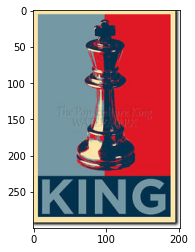

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = image.load_img('/content/Chessman-image-dataset/Chess/King/00000069.jpg')
imgplot = plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/content/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.1,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 8,
    class_mode = 'categorical',
    subset = 'training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


## Not using transfer learning

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150with 3 bytes color
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    #  Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
hist = model.fit(train_generator,
                 validation_data = validation_generator,
                 epochs = 50,
                 verbose = 2)

Epoch 1/50
63/63 - 27s - loss: 1.9714 - accuracy: 0.1743 - val_loss: 1.7901 - val_accuracy: 0.1923 - 27s/epoch - 423ms/step
Epoch 2/50
63/63 - 10s - loss: 1.7884 - accuracy: 0.1824 - val_loss: 1.7830 - val_accuracy: 0.2115 - 10s/epoch - 157ms/step
Epoch 3/50
63/63 - 10s - loss: 1.7760 - accuracy: 0.2044 - val_loss: 1.7790 - val_accuracy: 0.2692 - 10s/epoch - 163ms/step
Epoch 4/50
63/63 - 19s - loss: 1.7413 - accuracy: 0.2525 - val_loss: 1.7539 - val_accuracy: 0.1538 - 19s/epoch - 298ms/step
Epoch 5/50
63/63 - 10s - loss: 1.7187 - accuracy: 0.2445 - val_loss: 1.7642 - val_accuracy: 0.1923 - 10s/epoch - 154ms/step
Epoch 6/50
63/63 - 13s - loss: 1.6848 - accuracy: 0.2786 - val_loss: 1.7786 - val_accuracy: 0.2500 - 13s/epoch - 200ms/step
Epoch 7/50
63/63 - 12s - loss: 1.6917 - accuracy: 0.2605 - val_loss: 1.7862 - val_accuracy: 0.1923 - 12s/epoch - 188ms/step
Epoch 8/50
63/63 - 10s - loss: 1.6519 - accuracy: 0.3186 - val_loss: 1.6899 - val_accuracy: 0.2500 - 10s/epoch - 157ms/step
Epoch 9/

Accuracy obtained is about 50% where the model will make about 50 percent wrong predictions.

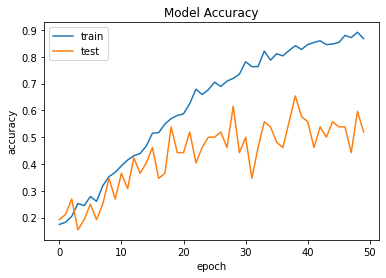

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy'),
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'best')
plt.show()

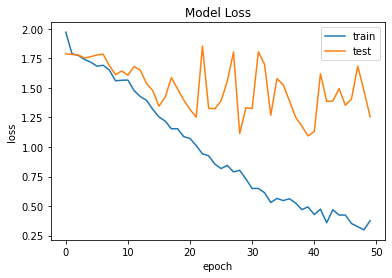

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'best')
plt.show()

## Using transfer learning

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

model_transfer = tf.keras.models.Sequential([
    ResNet152V2(weights = 'imagenet', include_top = False,
                input_tensor = Input(shape = (150, 150, 3))),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
])

model_transfer.layers[0].trainable = False

234545216/234545216 [==============================] - 6s 0us/step


In [ ]:
model_transfer.compile(optimizer = tf.optimizers.Adam(),
                       loss = 'categorical_crossentropy',
                       metrics = ['accuracy'])

In [ ]:
hist_transfer = model_transfer.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 50,
    verbose = 2
)

Epoch 1/50
63/63 - 24s - loss: 8.8558 - accuracy: 0.4349 - val_loss: 2.2930 - val_accuracy: 0.6346 - 24s/epoch - 376ms/step
Epoch 2/50
63/63 - 11s - loss: 1.4950 - accuracy: 0.7255 - val_loss: 2.1317 - val_accuracy: 0.6154 - 11s/epoch - 175ms/step
Epoch 3/50
63/63 - 12s - loss: 1.4990 - accuracy: 0.7275 - val_loss: 1.8118 - val_accuracy: 0.6346 - 12s/epoch - 190ms/step
Epoch 4/50
63/63 - 11s - loss: 0.9149 - accuracy: 0.7836 - val_loss: 0.8155 - val_accuracy: 0.7885 - 11s/epoch - 172ms/step
Epoch 5/50
63/63 - 11s - loss: 0.9029 - accuracy: 0.8156 - val_loss: 1.5413 - val_accuracy: 0.7500 - 11s/epoch - 171ms/step
Epoch 6/50
63/63 - 11s - loss: 0.6886 - accuracy: 0.8597 - val_loss: 1.3035 - val_accuracy: 0.6731 - 11s/epoch - 170ms/step
Epoch 7/50
63/63 - 11s - loss: 0.7006 - accuracy: 0.8557 - val_loss: 0.6367 - val_accuracy: 0.7885 - 11s/epoch - 171ms/step
Epoch 8/50
63/63 - 11s - loss: 0.5447 - accuracy: 0.8717 - val_loss: 1.0708 - val_accuracy: 0.7692 - 11s/epoch - 171ms/step
Epoch 9/

The accuracy of the model increases

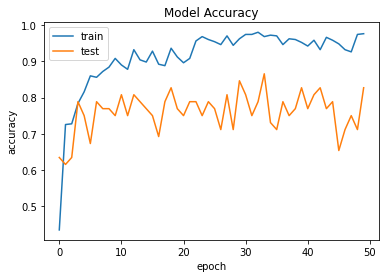

In [ ]:
plt.plot(hist_transfer.history['accuracy'])
plt.plot(hist_transfer.history['val_accuracy'])
plt.title('Model Accuracy'),
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'best')
plt.show()

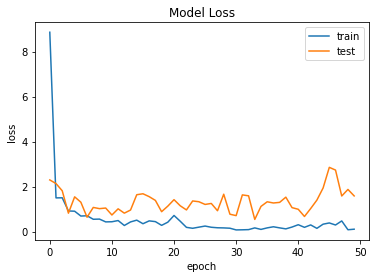

In [ ]:
plt.plot(hist_transfer.history['loss'])
plt.plot(hist_transfer.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'best')
plt.show()